In [ ]:
pip install sklearn


In [1]:
import pandas as pd
import scipy
from scipy.stats import skew
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('CleanCredit.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'CleanCredit.csv'

In [8]:
df = pd.concat([df, pd.get_dummies(df['DATA_TYPE'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['PRODUCT_TYPE'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['DISTRIBUTION_CHANNEL'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['COVER_TYPE'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['REASON_LOAN'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['JOB'])], axis=1)

In [9]:
### Set REFERENCE_DATE and DATE_OF_DEFAULT as date variables
df['REFERENCE_DATE'] = pd.to_datetime(df['REFERENCE_DATE']) ### ,format = '%b-%y'
df['DATE_OF_DEFAULT'] = pd.to_datetime(df['DATE_OF_DEFAULT'])

In [10]:
### Drop original columns and newly created dummys to prevent collinearity
df = df.drop(columns=['DATA_TYPE','APP','PRODUCT_TYPE', 'DISTRIBUTION_CHANNEL', 'DIRECT','COVER_TYPE', 'Single family house', 'REASON_LOAN', 'REASON_LOAN_MISSING', 'JOB_MISSING', 'JOB'])

# Amount of NaNs per column:

- OUTSTANDING_MORTGAGE_CREDIT:     <span style="color:red"> **556** </span>
- MARKET_VALUE_MORTGAGE:             <span style="color:red"> **114** </span>
- YOJ_JOB:                           <span style="color:red"> **560** </span>
- DEROG                          <span style="color:red"> **917** </span> 
- DELINQ                          <span style="color:red"> **777** </span>
- CLAGE                           <span style="color:red"> **317** </span>
- NINQ                            <span style="color:red"> **631** </span>
- CLNO                            <span style="color:red"> **234** </span>
- DEBTINC                       <span style="color:red"> **1363** </span> 

# NaN Handling using Mean/Median. Note: kNN/imperative imputation will also be done

33.79935825283623
34.881264380000005


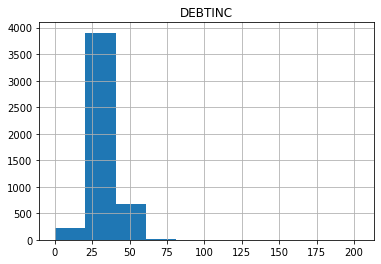

In [11]:
### Check for distributions:
df.hist(column="DEBTINC")
print(df['DEBTINC'].mean())
#print(skew(df['OUTSTANDING_MORTGAGE_CREDIT'], axis=0, bias=True))
print(df['DEBTINC'].median())



In [12]:
###Replace NaNs
df['DEROG'] = df['DEROG'].fillna(0) ## Assumption: if empty, no major derogatory reports
df['DELINQ'] = df['DELINQ'].fillna(0) ## Assumption: if empty, no delinquent credit lines
df['OUTSTANDING_MORTGAGE_CREDIT'] = df['OUTSTANDING_MORTGAGE_CREDIT'].fillna(value=df['OUTSTANDING_MORTGAGE_CREDIT'].median()) ## Replace with mean
df['MARKET_VALUE_MORTGAGE'] = df['MARKET_VALUE_MORTGAGE'].fillna(value=df['MARKET_VALUE_MORTGAGE'].mean())
df['YOJ_JOB'] = df['YOJ_JOB'].fillna(value=df['YOJ_JOB'].median()) ### KNN since ordinal
df['CLAGE'] = df['CLAGE'].fillna(value=df['CLAGE'].mean())
df['NINQ'] = df['NINQ'].fillna(value=df['NINQ'].fillna(1)) ### Replace with Median since skewed
df['CLNO'] = df['CLNO'].fillna(value=df['CLNO'].fillna(20)) ### Replace with Median since skewed
df['DEBTINC'] = df['DEBTINC'].fillna(value=df['DEBTINC'].mean())

In [21]:
###Use only observations with “DATA_TYPE” = “RDS” and split your datasets (y and X) in ‘Training’ and ‘Test’ data. 

df1 = df.loc[df['RDS'] == 1]
X_train, X_test, Y_train, Y_test = train_test_split(df1.drop('DEFAULT_FLAG', axis = 1), df1['DEFAULT_FLAG'], test_size = 0.2, stratify=df1['DEFAULT_FLAG'], shuffle=True)
## stratify preserves the proportion of how data is distributed in the target column and depicts that same proportion of distribution in the train_test_split 

In [14]:
### This is X and Y for APP == 1 | Note, no training&test sets
df2 = df.loc[df['RDS'] == 0] ### This is APP == 1
Y_APP = df2['DEFAULT_FLAG']
X_APP = df2[df.columns.drop('DEFAULT_FLAG')]


In [15]:
### Calculating Population Stability Index
### Exclude "ID_CUSTOMER", "REFERENCE_DATE", "DATE_OF_DEFAULT", "DEFAULT_FLAG" and "DATA_TYPE" -> last two already dropped before
X_train = X_train.drop(columns=["ID_CUSTOMER", "REFERENCE_DATE", "DATE_OF_DEFAULT"])
X_APP = X_APP.drop(columns=["ID_CUSTOMER", "REFERENCE_DATE", "DATE_OF_DEFAULT"])


In [16]:
df['DEFAULT_FLAG'].value_counts(normalize=True)

0    0.808195
1    0.191805
Name: DEFAULT_FLAG, dtype: float64

0    0.800545
1    0.199455
Name: DEFAULT_FLAG, dtype: float64
0    0.800336
1    0.199664
Name: DEFAULT_FLAG, dtype: float64
